<a href="https://colab.research.google.com/github/anhvt00/Models-of-Neural-Systems/blob/main/MNS_CP_Exercise_1_Vu_Nowaczyk_Singer_Wassenberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Models of Neural Systems (Computer Practical) - Problem set 1

**AI tools have been used to review the solution!**

Tien Anh Vu

Max Nowaczyk

Niclas Singer-Wassenberg




#### Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Exercise 1: McCulloch-Pitts neuron

#### 1a: Define a McCulloch-Pitts neuron function

In [ ]:
def mcculloch_pitts(x, w):
  """Implement a Mcculloch-Pitts neuron

  Args:
    x: Input vector with the first element being -1 (bias).
    w: Weight vector.

  Returns:
    The output of the neuron (1 or -1).
  """
  weighted_sum = np.dot(w, x)

  # The activation function in a McCulloch-Pitts neuron is the step function
  output = np.sign(weighted_sum)
  return output

#### 1b: Show that the neuron performs a logical AND operation

In [ ]:
w = np.array([3, 2, 2])

# Test cases for AND operation
inputs = [
    # The first element is bias that is always -1
    # The second and third elements correspond to x1, x2
    np.array([-1, -1, -1]),  # x1 = -1, x2 = -1
    np.array([-1, -1, 1]),   # x1 = -1, x2 = 1
    np.array([-1, 1, -1]),   # x1 = 1, x2 = -1
    np.array([-1, 1, 1])    # x1 = 1, x2 = 1
]

for x in inputs:
  output = mcculloch_pitts(x, w)
  print(f"Input: {x[1:]}, Output: {output}")
print("This neuron realizes AND function")

Input: [-1 -1], Output: -1
Input: [-1  1], Output: -1
Input: [ 1 -1], Output: -1
Input: [1 1], Output: 1
This neuron realizes AND function


### Exercise 2: Activation functions

In [ ]:
# Generate data points for plotting
x = np.linspace(-5, 5, 100)

# Three different values for a
a_values = [0.2, 1, 10]

#### 2a: Sigmoid function

In [ ]:
# Define sigmoid function
def sigmoid(x, a):
  return 2 / (1 + np.exp(-a * x)) - 1

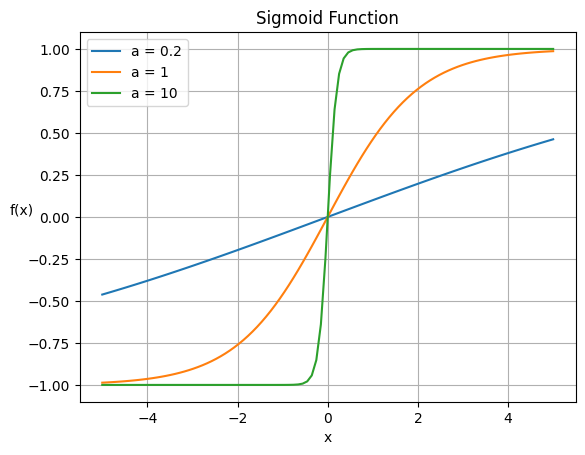

In [ ]:
# Create the plot
for a in a_values:
  plt.plot(x, sigmoid(x, a), label=f'a = {a}')

plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('f(x)', rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#### 2b: Hyperbolic tangent function

In [ ]:
# Define hyperbolic tangent function
def tanh(x, a):
  return np.tanh(a * x)

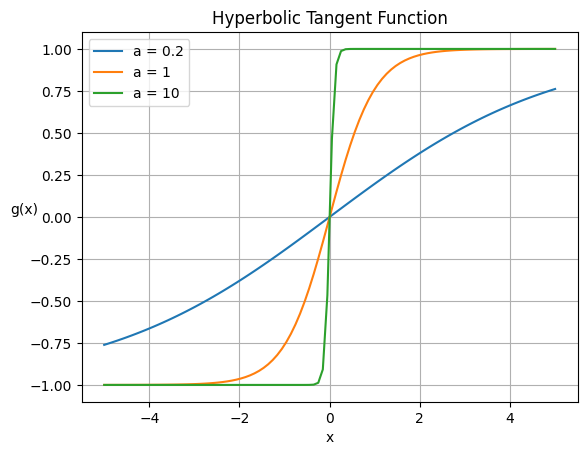

In [ ]:
# Create the plot
for a in a_values:
  plt.plot(x, tanh(x, a), label=f'a = {a}')

plt.title('Hyperbolic Tangent Function')
plt.xlabel('x')
plt.ylabel('g(x)', rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#### 2c: Piecewise linear function

In [ ]:
# Define piecewise linear function
def piecewise_linear(x, a):
  if x >= 1/a:
    return 1
  elif x > -1/a:
    return a * x
  else:
    return -1


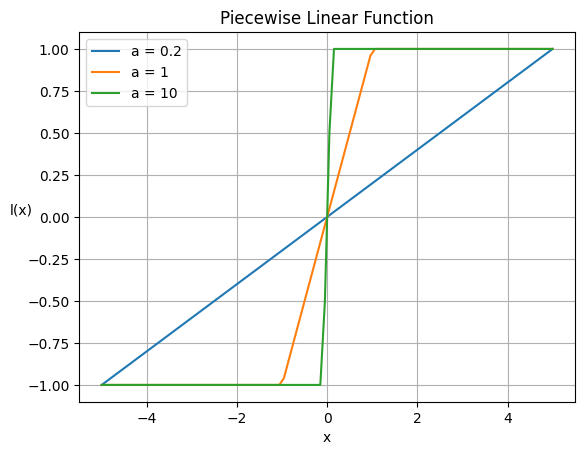

In [ ]:
# Create the plot
for a in a_values:
  # Calculate y values for each x
  y = [piecewise_linear(xi, a) for xi in x]
  plt.plot(x, y, label=f'a = {a}')

plt.title('Piecewise Linear Function')
plt.xlabel('x')
plt.ylabel('l(x)', rotation=0)
plt.legend()
plt.grid(True)
plt.show()

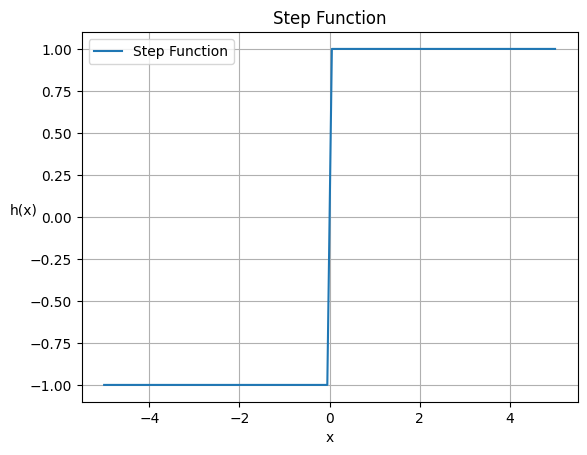

In [ ]:
# Define the step function
def step(x):
  return np.where(x >= 0, 1, -1)

# Create the plot
plt.plot(x, step(x), label='Step Function')

plt.title('Step Function')
plt.xlabel('x')
plt.ylabel('h(x)', rotation=0)
plt.legend()
plt.grid(True)
plt.show()

1. The parameter `a` **controls the steepness or slope of these functions** around the origin ($x=0$). Higher value of `a` indicates steeper curve, faster transition between minimum and maximum values.
2. The sigmoid, hyperbolic tangent or piecewise linear functions approach the step function $h(x)$, we increase `a` to a large number as demonstrated above. When `a` goes to $\infty$, these functions become the step function.

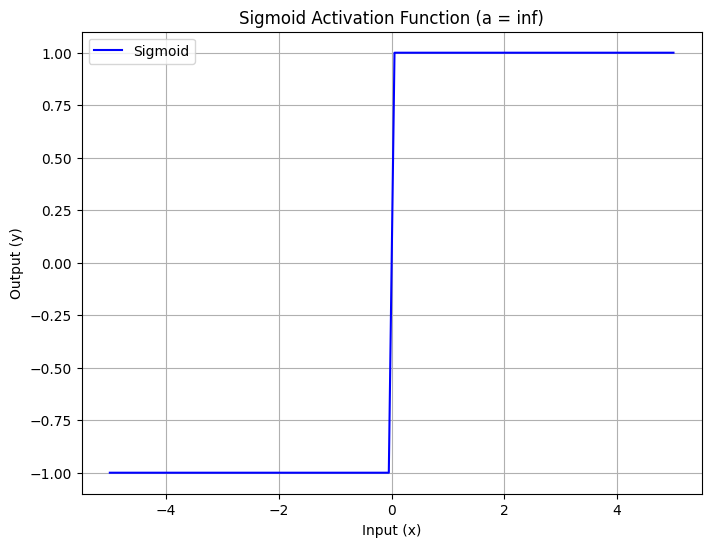

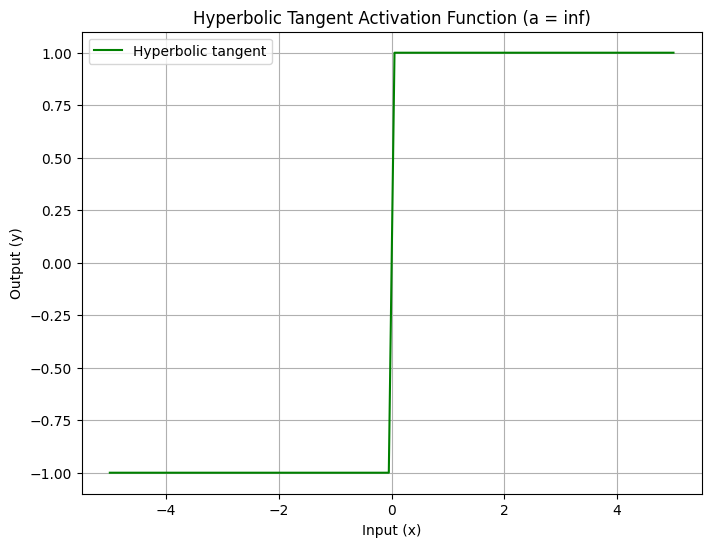

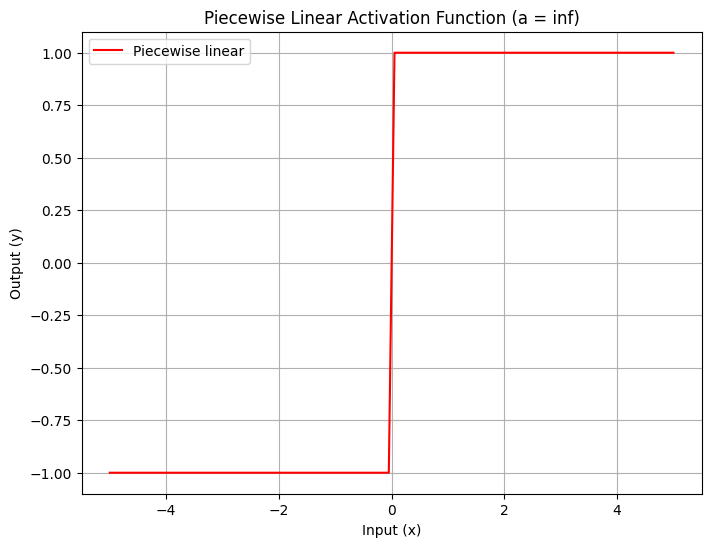

In [ ]:
# Plot activation functions when a goes to infinity
def plot_functions(param_a):
  y1 = [sigmoid(xi, param_a) for xi in x]
  y2 = [tanh(xi, param_a) for xi in x]
  y3 = [piecewise_linear(xi, param_a) for xi in x]

# Plot for Sigmoid
  plt.figure(figsize=(8, 6))
  plt.plot(x, y1, label="Sigmoid", color='b')
  plt.title(f"Sigmoid Activation Function (a = {param_a})")
  plt.xlabel("Input (x)")
  plt.ylabel("Output (y)")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot for Hyperbolic Tangent
  plt.figure(figsize=(8, 6))
  plt.plot(x, y2, label="Hyperbolic tangent", color='g')
  plt.title(f"Hyperbolic Tangent Activation Function (a = {param_a})")
  plt.xlabel("Input (x)")
  plt.ylabel("Output (y)")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot for Piecewise Linear
  plt.figure(figsize=(8, 6))
  plt.plot(x, y3, label="Piecewise linear", color='r')
  plt.title(f"Piecewise Linear Activation Function (a = {param_a})")
  plt.xlabel("Input (x)")
  plt.ylabel("Output (y)")
  plt.legend()
  plt.grid(True)
  plt.show()

plot_functions(np.inf)

### Exercise 3: Rosenblatt's perceptron

#### 3a: Create training set

In [ ]:
num_samples = 1000

# Set random seed before generating training data
np.random.seed(42)

# Generate random input values (x1, x2) from a standard normal distribution
x1 = np.random.randn(num_samples)
x2 = np.random.randn(num_samples)

# Create input vectors xi = [-1, x1, x2] (including bias term)
X = np.column_stack((-np.ones(num_samples), x1, x2))

# Define the desired response d(x) based on the comparison between x1 and x2
d = np.where(x2 - x1 >= 0.5, 1, -1)

# Print the first five training examples {(xi, d(xi))}, for i from 1 to 5
X[:5]

array([[-1.        ,  0.49671415,  1.39935544],
       [-1.        , -0.1382643 ,  0.92463368],
       [-1.        ,  0.64768854,  0.05963037],
       [-1.        ,  1.52302986, -0.64693678],
       [-1.        , -0.23415337,  0.69822331]])

#### 3b: Training the Mcculloch-Pitts neuron

In [ ]:
def train_mcculloch_pitts(inputs, outputs, eta=0.1, max_epochs=100):
    """Trains a McCulloch-Pitts neuron, stores weight history, and prints delta w."""
    # Input shape: (num_samples, num_input_features + 1), num_inputs + 1 because including the -1 term corresponding to the bias
    # In this case, we have two inputs x1 and x2 for each training example, so the num_input_features = 3
    # num_input_features is the number of components in the vector xi

    num_features = inputs.shape[1]
    # Initialize weights randomly
    # w is a vector with a size of 3, the first term represents w0 or the bias term, corresponding to the first input x0 = -1
    # The second and third terms are w1 and w2, corresponding to first and second inputs
    w = np.random.randn(num_features)

    # Create a history array of weights over time
    weights_history = []

    for epoch in range(max_epochs):
        weights_changed = False
        for i in range(len(inputs)):
            x = inputs[i]
            d = outputs[i]
            y = mcculloch_pitts(x, w)
            # Only use the error-correction update rule when the desired responses differ from the prediction response at a particular training example
            if y != d:
                # Calculate the error-correction update
                delta_w = eta * (d - y) * x
                # Update the weights
                w = w + delta_w
                weights_changed = True
                # Print delta w
                # print(f"Epoch {epoch + 1}, update at training example {i + 1}: delta w = {delta_w}")
                # Store weights after each iteration in a epoch
                weights_history.append(w.copy())

        if not weights_changed:
            print(f"\nConverged after {epoch + 1} epochs.")
            break
        # else:
        #     print(f"Epoch {epoch + 1}: Weights updated.")

    if weights_changed:
        print(f"Weights don't converge")

    return w, weights_history

In [ ]:
# Set random seed before training the neuron
np.random.seed(42)

trained_weights, weights_history = train_mcculloch_pitts(X, d)
print("Trained weights:", trained_weights)


Converged after 13 epochs.
Trained weights: [ 1.29671415 -2.5825324   2.59864505]


1. Typical, the learning rate $\eta$ is chosen in the interval $[0, 1]$. We used $\eta = 0.1$ as the learning rate, which balances between convergence speed and stability. If $\eta$ is too hight, it may lead to instability, while a very low $\eta$ would make the training excessively slow.
2. The Rosenblatt's perceptron is not fully biologically plausible. It does not take into account the temporal dynamics of the input. The perceptron learning rule is a supervised learning algorithm that relies on a desired response $d(\mathbb{x})$ to guide weight updates, whereas real neurons learn primarily through unsupervised mechanisms, such as Hebbian learning or reinforcement-based learning, which are driven by correlations between pre- and post-synaptic activity

#### 3c: Test on validation set

In [ ]:
# 1. Create a validation set
num_validation_samples = 200

# Set random seed before generating validation data
np.random.seed(42)

# Generate random input values for validation
x1_val = np.random.randn(num_validation_samples)
x2_val = np.random.randn(num_validation_samples)

# Create the input vector for validation
X_val = np.column_stack((-np.ones(num_validation_samples), x1_val, x2_val))

# Define the desired response for validation
d_val = np.where(x2_val - x1_val >= 0.5, 1, -1)

# 2. Test the neuron on the validation set
predictions = []
for x in X_val:
  prediction = mcculloch_pitts(x, trained_weights)
  predictions.append(prediction)

# 3. Evaluate the performance
accuracy = np.mean(predictions == d_val)
print(f"Accuracy on validation set: {accuracy}")

Accuracy on validation set: 1.0


#### 3d: Weight vector and decision boundary

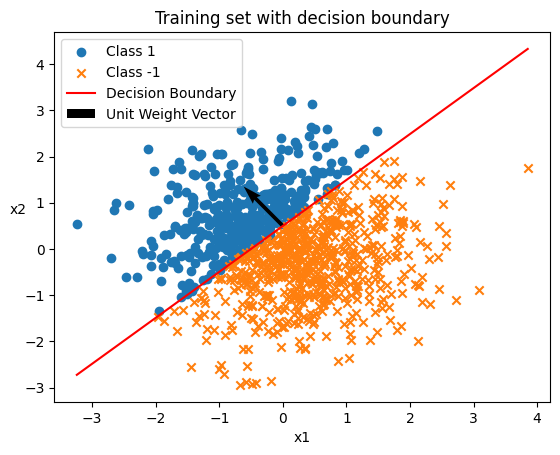

In [ ]:
# Plot the training set
plt.scatter(X[d == 1, 1], X[d == 1, 2], marker='o', label='Class 1')
plt.scatter(X[d == -1, 1], X[d == -1, 2], marker='x', label='Class -1')

# Superimpose with the weight vector
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)


# The decision boundary for an example x with two inputs x1, x2 is 0 = w1x1 + w2x2 + w0x0 = w1x1 + w2x2 - w0 (because x0 = -1)
# We can rewrite the line equation as x2 = (-w1x1 + w0)/w2 for w2 is non-zero
w0, w1, w2 = trained_weights
x2_decision_boundary = (-w1 * x1_range + w0) / w2

# Plot the decision boundary
plt.plot(x1_range, x2_decision_boundary, color = 'red', label='Decision Boundary')


# Calculate unit weight vector
weight_vector = np.array([w1, w2])
unit_vector = weight_vector / np.linalg.norm(weight_vector)

# Plot with quiver, starting from (0, w0/w2), a point on the decision boundary
plt.quiver(0, w0/w2, unit_vector[0], unit_vector[1], scale_units='xy', scale=1, color='black', label='Unit Weight Vector')

plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
plt.title('Training set with decision boundary')
plt.legend()
plt.show()

In [ ]:
# Check if the decision boundary and unit weight vector is orthogonal
decision_boundary_direction = np.array([1, -w1 / w2])
decision_boundary_unit_vector = decision_boundary_direction / np.linalg.norm(decision_boundary_direction)
dot_product = np.dot(unit_vector, decision_boundary_unit_vector)
print(dot_product)
print("The decision boundary and unit weight vector is indeed orthogonal")

5.551115123125783e-17
The decision boundary and unit weight vector is indeed orthogonal


1. The weight vector obtained through the error-correction rule is considered optimal in the sense that it minimizes the number of misclassification on the training set. The error-correction rule iteratively adjusts the weights to reduce the error, and it converges when no further weight changes occur.

2. A perceptron can be considered to perform a generalized logical operation because it extends traditional Boolean logic, which works with binary inputs, to **continuous input spaces** (standard Gaussian distributed values) where decisions are based on a weighted sum and a threshold. In this context, the perceptron learned to classify points based on a linear inequality of input features ($x_i,1 -x_i, 2 \ge 0.5$), which functions as **a complex comparison operation following a threshold unit rather than a simple AND/OR gate**. Assume the input features $x_1$ and $x_2$ are **binary**, then this network is actually equivalent to an **inhibition logical function**, which outputs +1 if $x_2$ is 1 (on) and $x_1$ is -1 (off), and 0 otherwise. This means the activation of $x_2$ inhibits the activation of $x_1$, which explains why the network output is on (+1) when $x_2 = 1$ and $x_1 = -1$. In other cases, $x_1 = 1, x_2 = -1$ or $x_1 = 1, x_2 = 1$ or $x_1 = -1, x_2 = -1$ the network output is -1, showing no signs that $x_2$ inhibits $x_1$.

### Exercise 4

#### 4a: Plot XOR problem

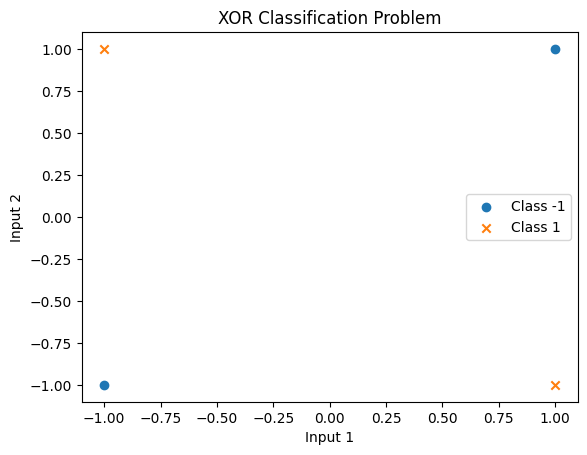

In [ ]:
# XOR inputs and outputs
# The first term is -1 corresponding to the bias term in the weight vector
inputs = np.array([[-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, 1]])
outputs = np.array([-1, 1, 1, -1])

# Plot the data points
plt.scatter(inputs[outputs == -1, 1], inputs[outputs == -1, 2], marker='o', label='Class -1')
plt.scatter(inputs[outputs == 1, 1], inputs[outputs == 1, 2], marker='x', label='Class 1')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Classification Problem')
plt.legend()
plt.show()

#### 4b: Train a perceptron to perform the XOR function on binary inputs

Weights don't converge


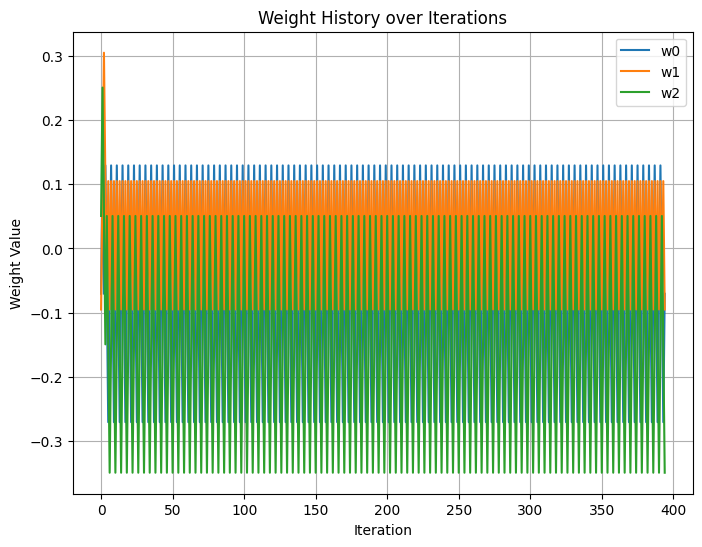

In [ ]:
# Set seed before training the perceptron
np.random.seed(41)

# Train the perceptron and get weight history
trained_weights, weights_history = train_mcculloch_pitts(inputs, outputs, eta=0.1, max_epochs=100)

# Plot the weights over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(len(weights_history)), [w[0] for w in weights_history], label='w0')
plt.plot(range(len(weights_history)), [w[1] for w in weights_history], label='w1')
plt.plot(range(len(weights_history)), [w[2] for w in weights_history], label='w2')

# 4 iterations per epoch
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weight History over Iterations')
plt.legend()
plt.grid(True)
plt.show()

The weights $w_0, w_1, w_2$ do not settle down on fixed values over iterations, which fluctuate around a point. The weights do not converge because the perceptron is unable to learn a non-linearly seperable, XOR in this case.

#### 4c: Linearly seperable logical functions can be learnt by perceptrons

<ipython-input-21-794a7b85e4ec>:46: RuntimeWarning: divide by zero encountered in scalar divide
  y = midpoint[1] + (perpendicular_vector[1] / perpendicular_vector[0]) * (x - midpoint[0])
<ipython-input-21-794a7b85e4ec>:42: RuntimeWarning: invalid value encountered in divide
  perpendicular_vector = perpendicular_vector / np.linalg.norm(perpendicular_vector)


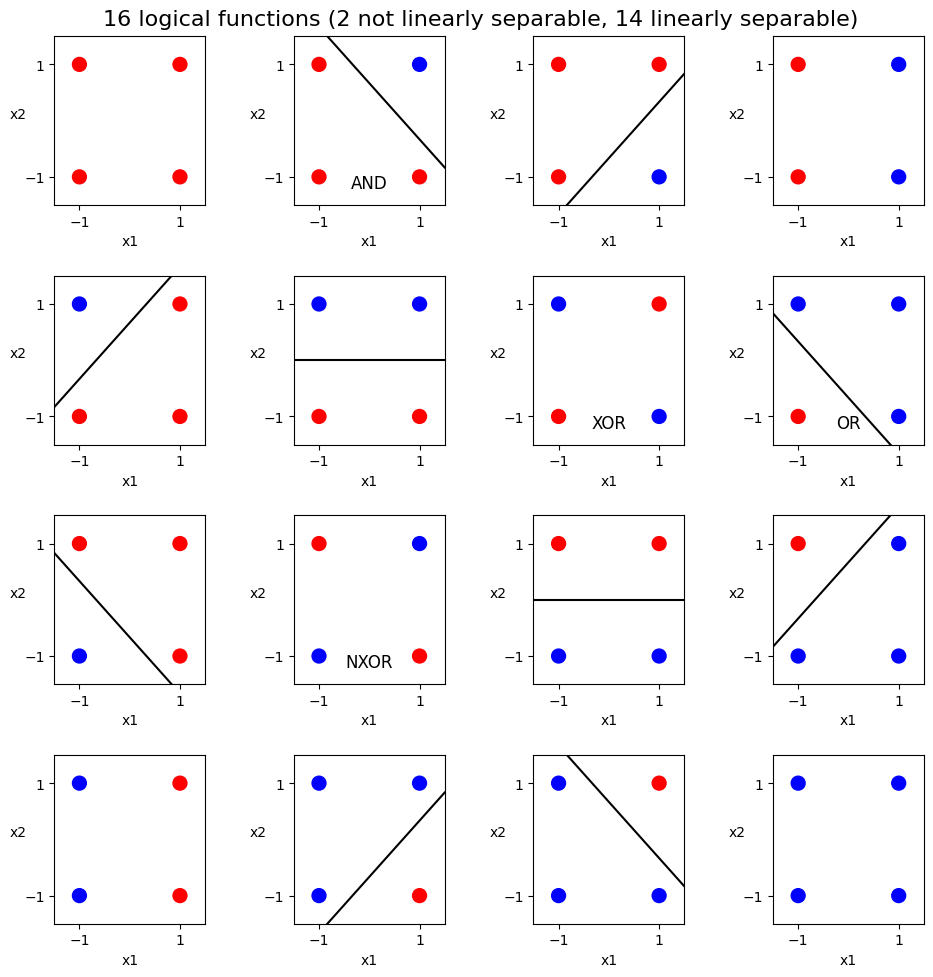

In [ ]:
# Define the 4 points
points = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])

# Generate all 16 color combinations (0, 1 represent two colors)
color_combinations = list(itertools.product([0, 1], repeat=4))

# Create a 4x4 grid of plots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.tight_layout(pad=3.0)  # Add padding between subplots

# Add title to the whole plot
fig.suptitle("16 logical functions (2 not linearly separable, 14 linearly separable)", fontsize=16)


# Define a dictionary mapping color configurations to logical operations
logic_labels = {
    (0, 0, 0, 1): "AND",
    (0, 1, 1, 1): "OR",
    (0, 1, 1, 0): "XOR",
    (1, 0, 0, 1): "NXOR",
}

# Iterate through color combinations and plot
for i, color_config in enumerate(color_combinations):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Plot points with specified colors
    colors = ['red' if c == 0 else 'blue' for c in color_config]
    ax.scatter(points[:, 0], points[:, 1], c=colors, s=100)

    # Find a linear decision boundary (if possible)
    red_points = points[np.array(color_config) == 0]
    blue_points = points[np.array(color_config) == 1]

    if len(red_points) > 0 and len(blue_points) > 0:
        # Calculate midpoint and perpendicular vector (as before)
        midpoint = (red_points.mean(axis=0) + blue_points.mean(axis=0)) / 2
        diff = blue_points.mean(axis=0) - red_points.mean(axis=0)
        perpendicular_vector = np.array([-diff[1], diff[0]])
        perpendicular_vector = perpendicular_vector / np.linalg.norm(perpendicular_vector)

        # Define and plot decision boundary line
        x = np.linspace(-1.5, 1.5, 100)
        y = midpoint[1] + (perpendicular_vector[1] / perpendicular_vector[0]) * (x - midpoint[0])
        ax.plot(x, y, color='black')

    # Add logic label if applicable
    label = logic_labels.get(color_config)
    if label:
        ax.text(0, -1.2, label, ha='center', fontsize=12)

    # Customize plot
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_xticks([-1, 1])
    ax.set_yticks([-1, 1])
    # Add labels for each axis
    ax.set_xlabel('x1')
    ax.set_ylabel('x2', rotation=0)

plt.show()

There are 16 possible logical operations with two inputs. Of these, 14 are linearly separable, meaning a straight line can be drawn to separate the two classes. Only two logical operations, XOR and NXOR, are not linearly separable, as no single straight line can divide their input space into distinct classes. Perceptrons are limited to learning linearly separable decision boundaries because their output is based on a weighted sum of inputs compared to a threshold.

When we try to identify algebraiclly the weights of the perceptron $w_1$ and $w_2$ corresponding to XOR logical function, we end up at this system of inequalities

\begin{align}
-w_1 - w_2 &< w_0  \quad (1)\\
w_1 + w_2 &< w_0 \quad (2)\\
w_1 - w_2 &\ge w_0 \quad (3)\\
-w_1 + w_2 &\ge w_0 \quad (4)
\end{align}

Combining $(1)$ and $(3)$, we obtain $w_1 < 0$, while combining $(2)$ and $(4)$, we got $w_1 > 0$. These inequalities cannot be satisfied at the same time, so we are unable to find a combination of weights $w_1$ and $w_2$ so they seperate inputs for the XOR function, which means this function is not linearly separable. Similarly, we can prove the NXOR function is also not linearly separable.

